# Python, Jupyter, napari demo notebook ZIDAS 2023

The image can be read directly from the web or downloaded locally using     'https://github.com/guiwitz/PyImageCourse_beginner/raw/master/images/19838_1252_F8_1.tif')

## 1. Import image

In [1]:
import skimage
image = skimage.io.imread('19838_1252_F8_1.tiff')

In [2]:
image.shape

(2048, 2048, 3)

## 2. Filter third channel and threshold

In [4]:
nucl_channel = 2
image_gauss = skimage.filters.gaussian(image[:,:,nucl_channel])

In [5]:
threshold = skimage.filters.threshold_otsu(image_gauss)

## 3. Create mask and detect objects

In [6]:
mask = image_gauss > threshold

In [7]:
image_labels = skimage.morphology.label(mask)

## 4. Visualization

In [9]:
import napari

In [10]:
viewer = napari.Viewer()

In [11]:
viewer.add_image(image, channel_axis=2);

In [12]:
viewer.add_labels(image_labels);

## 5. Recover annotated data and measure

In [14]:
new_labels = viewer.layers['image_labels'].data

In [15]:
measurements = skimage.measure.regionprops_table(
    label_image=new_labels,
    intensity_image=image[:,:,0],
    properties=('area', 'mean_intensity'))

In [16]:
measurements

{'area': array([9.0160e+03, 1.4167e+04, 5.0000e+00, 8.5000e+01, 1.9405e+04,
        5.6000e+01, 8.0000e+00, 2.8033e+04, 2.0000e+00, 1.0000e+00,
        6.2000e+01, 1.0000e+01, 1.5387e+04, 2.0516e+04, 3.1189e+04,
        2.0000e+00, 3.0781e+04, 3.2867e+04, 3.0000e+00, 2.1996e+04,
        2.3465e+04]),
 'mean_intensity': array([39.42269299, 20.29328722, 43.4       , 62.16470588, 17.4158722 ,
        56.94642857, 48.5       , 16.06445974, 10.        , 20.        ,
         5.25806452, 25.5       , 10.78897771, 10.68863326, 11.23296675,
         1.5       , 10.67492934,  7.08160161, 13.66666667, 15.71617567,
        12.21581078])}

## 6. Post-processing

In [17]:
import pandas as pd

In [18]:
measurements_df = pd.DataFrame(measurements)

In [19]:
measurements_df

,area,mean_intensity
0,9016.0,39.422693
1,14167.0,20.293287
2,5.0,43.400000
3,85.0,62.164706
4,19405.0,17.415872
5,56.0,56.946429
6,8.0,48.500000
7,28033.0,16.064460
8,2.0,10.000000
9,1.0,20.000000


In [20]:
# install missing package
# beware this can potentially be "dangerous" but works most of the time
#!pip install seaborn

In [21]:
import seaborn as sns

<Axes: xlabel='area', ylabel='mean_intensity'>

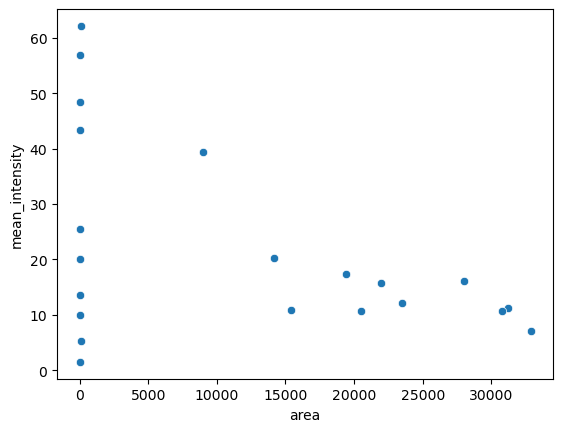

In [23]:
sns.scatterplot(
    data=measurements_df,
    x='area',
    y='mean_intensity')